# **Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
!pip uninstall yfinance
!pip uninstall pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader



Found existing installation: pandas-datareader 0.9.0
Uninstalling pandas-datareader-0.9.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_datareader-0.9.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_datareader/*
Proceed (y/n)? y
  Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 6.3 MB 28.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 109 kB 33.5 MB/s 


In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','IBM','CERN','FB']

start = datetime(2016,1,1)
end = datetime.now()




In [4]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN, IBM, CERN, FB]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","IBM","CERNER","FACEBOOK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-11-29,340.670013,335.304993,336.890015,338.029999,16650949.0,338.029999,FACEBOOK
2021-11-30,335.809998,323.429993,335.000000,324.459991,25390008.0,324.459991,FACEBOOK
2021-12-01,330.500000,310.290009,330.290009,310.600006,30384083.0,310.600006,FACEBOOK
2021-12-02,314.600006,307.200012,311.399994,310.390015,24396169.0,310.390015,FACEBOOK
2021-12-03,313.750000,299.500000,313.730011,306.839996,27471010.0,306.839996,FACEBOOK
2021-12-06,320.100006,306.339996,308.130005,317.869995,21758340.0,317.869995,FACEBOOK
2021-12-07,326.540009,321.000000,321.570007,322.809998,18794047.0,322.809998,FACEBOOK
2021-12-08,332.750000,323.070007,325.000000,330.559998,19937722.0,330.559998,FACEBOOK
2021-12-09,336.130005,328.000000,329.540009,329.820007,16834682.0,329.820007,FACEBOOK


In [6]:
AAPL.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1497 entries, 2016-01-04 to 2021-12-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          1497 non-null   float64
 1   Low           1497 non-null   float64
 2   Open          1497 non-null   float64
 3   Close         1497 non-null   float64
 4   Volume        1497 non-null   float64
 5   Adj Close     1497 non-null   float64
 6   company_name  1497 non-null   object 
dtypes: float64(6), object(1)
memory usage: 93.6+ KB


In [7]:


df.isna().sum()



High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

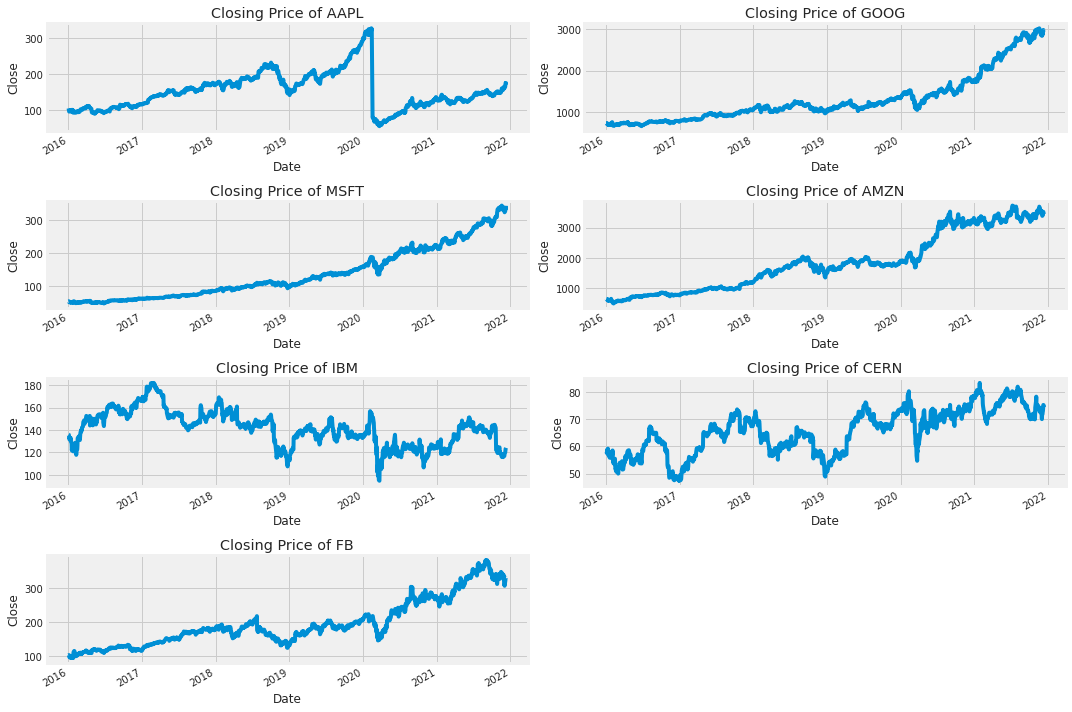

In [8]:
# historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

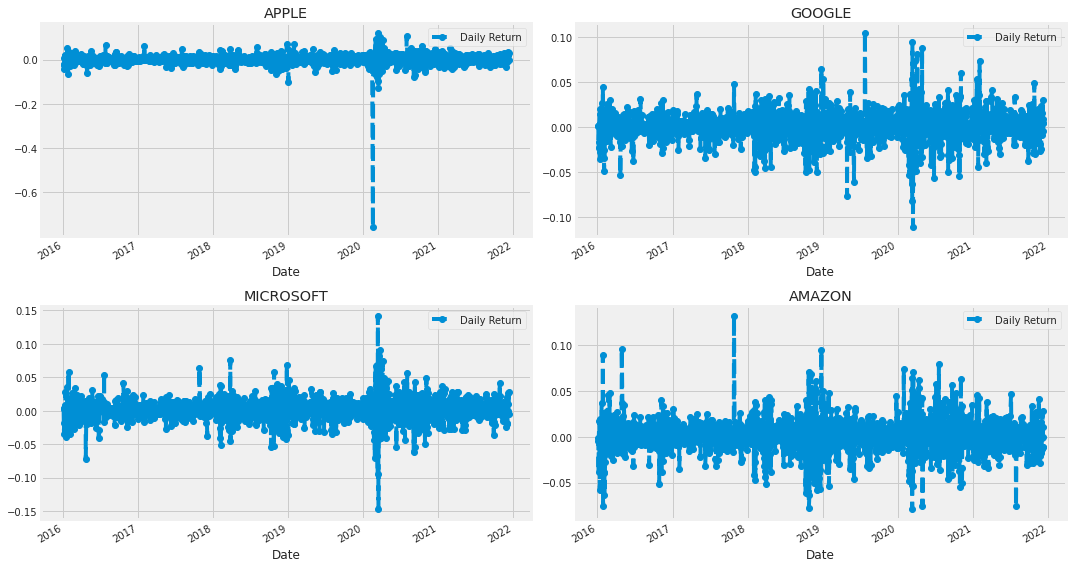

In [9]:


# using pct_change to find percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plotting daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()



In [10]:
data = DataReader('AAPL', data_source='yahoo', start='2020-01-01', end=datetime.now())

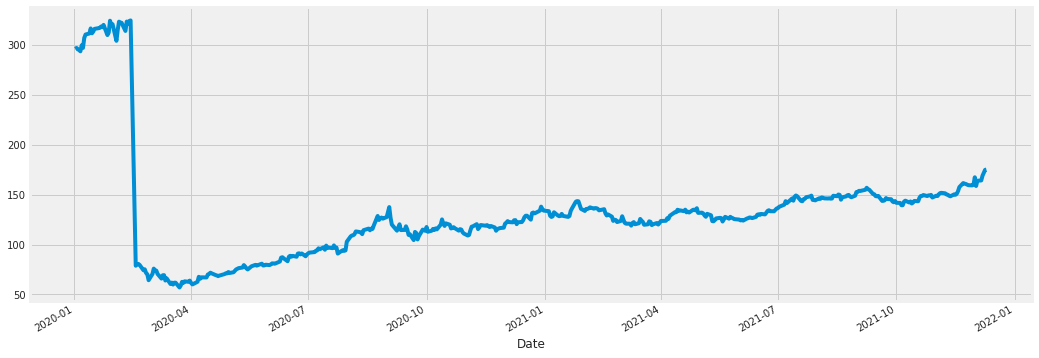

In [11]:
data['Open'].plot(figsize=(16,6))

In [12]:
data = DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2020-01-01')

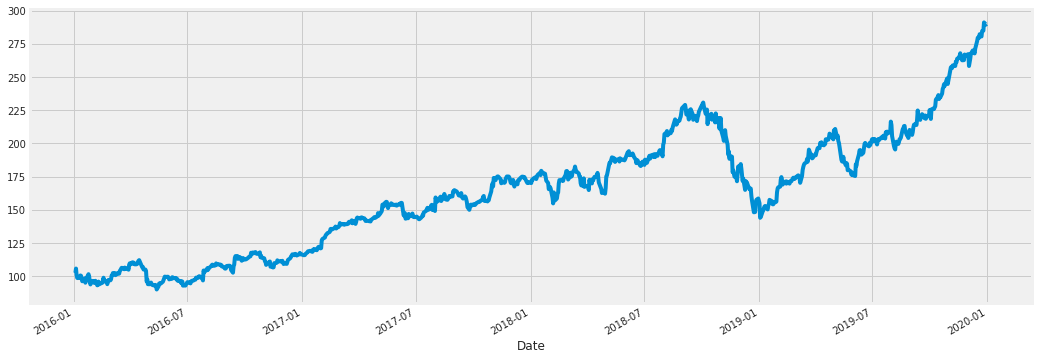

In [13]:
data['Open'].plot(figsize=(16,6))

In [14]:


scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(data).reshape(-1,1))



In [15]:


# splitting dataset into train and test split

X=int(len(df)*0.75)
y=len(df)-X

# Standarize dataset values to reduce loss
train_mean = df[:X].mean()
train_std = df[:X].std()

df = (df-train_mean)/train_std
train_data,test_data=df[0:X,:],df[X:len(df),:1]



In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(4525, 1)
(4525,)


(None, None)

# **Machine Learning Model #1**

In [19]:
# Machine Learning Model Regression #1
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [22]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print("Train Mean Squared Error: ", lr_train_mse)
print("Test Mean Squared Error: ", lr_test_mse)
print("Train R^2 Score: ", lr_train_r2)
print("Test R^2 Score: ", lr_test_r2)

Train Mean Squared Error:  0.9749050938075162
Test Mean Squared Error:  0.6619033081787539
Train R^2 Score:  0.025456922875994326
Test R^2 Score:  0.02164707153367984


In [23]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

print(lr_results)

              Method Training MSE Training R2  Test MSE    Test R2
0  Linear regression     0.974905   0.0254569  0.661903  0.0216471


# Machine Learning Model #2

In [24]:
# Machine Learning Model Regression #2
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

#X_train, y_train = create_dataset(train_data, time_step)
#X_test, y_test = create_dataset(test_data, time_step)

In [25]:
lsvr = LinearSVR(verbose=0, dual=True)
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR()

In [26]:
lsvr.fit(X_train, y_train)

LinearSVR()

In [27]:
lsvr_score_r2 = lsvr.score(X_train, y_train)
lsvr_score_cv = cross_val_score(lsvr, X_train, y_train, cv = 10)

In [28]:
print("R^2 Score: ", lsvr_score_r2)
print("CV Mean Score: ", lsvr_score_cv.mean())

R^2 Score:  -0.15955164817591805
CV Mean Score:  -0.1659272835979855


In [29]:
# predicting model_2 & getting accuracy
lsvr_y_pred = lsvr.predict(X_test)

lsvr_mse = mean_squared_error(y_test, lsvr_y_pred)
lsvr_rmse = lsvr_mse*(1/2.0)

print("Mean Squared Error: ", lsvr_mse)
print("Root Mean Square Error: ", lsvr_rmse)

Mean Squared Error:  0.7919061311135672
Root Mean Square Error:  0.3959530655567836
